In [9]:
import pickle

import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [4]:
with open("result_plot/sim_result.pkl","rb") as handle:
    sim_result = pickle.load(handle)

In [32]:
def rmsd(y1, y2):
    return np.average((y1 - y2)**2)

In [102]:
imag_C1.shape

(30000,)

In [125]:
plot_range = slice(0, 40000)# len(sim_result["steps"]))

imag_C1 = np.imag(np.array(sim_result["C"])[plot_range,0]).ravel()
real_C1 = np.real(np.array(sim_result["C"])[plot_range,0]).ravel()
y = real_C1

T = np.arange(1, len(y) + 1) * sim_result["h"]

In [132]:
n = np.arange(1,50 + 1)

error = 1e6
best_P = None
best_X = None
best_model = None
for P in np. arange(20,50,1):

    X = np.hstack(
        [np.cos(2 * np.pi * np.outer(T,n)/P), 
         np.sin(2 * np.pi * np.outer(T,n)/P)]
    )

    lm = LinearRegression()
    lm.fit(X, y)

    new_error = rmsd(lm.predict(X), y)
    if new_error < error:
        best_P = P
        best_X = X
        error = new_error
        best_model = lm

In [133]:
print(best_P, error)

44 7.29469746103158e-09


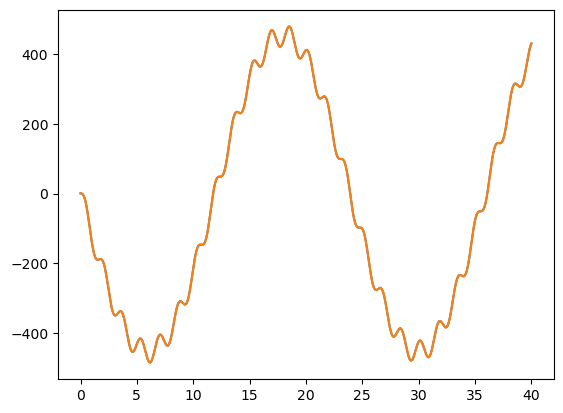

In [134]:
fig, ax = plt.subplots()

ax.plot(T, y)
ax.plot(T, best_model.predict(best_X))

In [135]:
best_model.coef_

array([-7.36435893e+01,  1.81528011e+02,  1.94412081e+00, -9.64340804e+00,
       -1.34804242e+01, -1.31210041e+01, -1.28283247e+01, -1.18227962e+01,
       -1.15299220e+01, -9.27227675e+00, -7.56386273e+00, -5.84723447e+00,
       -4.18155787e+00, -2.59615640e+00, -1.15706541e+00,  9.37383240e-02,
        1.16989055e+00,  2.03598744e+00,  2.67149123e+00,  3.55115792e+00,
        3.83014665e+00,  4.20129523e+00,  4.63985970e+00,  5.33846246e+00,
        6.91359299e+00,  1.35554027e+01, -2.01573347e+01, -3.65022400e+00,
       -1.40702987e+00, -5.97992856e-01, -2.24602875e-01, -4.73077455e-02,
       -2.13899115e-03,  2.86714043e-01,  1.73071749e-01,  1.47309291e-01,
        1.22525740e-01,  9.70491434e-02,  7.30725350e-02,  5.31232669e-02,
        2.86408560e-02,  1.90145446e-02,  1.02707129e-02,  4.54045781e-03,
        1.25615578e-03, -3.06212800e-04, -8.01631286e-04, -7.80101591e-04,
       -5.04105603e-04, -2.24437787e-04,  5.33066088e+01, -3.92270796e+02,
       -5.94896333e+01, -

In [45]:
X

array([[ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99998026,  0.99992104,  0.99982235, ...,  0.05024432,
         0.05651853,  0.06279052],
       [ 0.99992104,  0.99968419,  0.99928947, ...,  0.10036171,
         0.11285638,  0.12533323],
       ...,
       [ 0.99982235,  0.99928947,  0.99840155, ..., -0.15022559,
        -0.16883344, -0.18738131],
       [ 0.99992104,  0.99968419,  0.99928947, ..., -0.10036171,
        -0.11285638, -0.12533323],
       [ 0.99998026,  0.99992104,  0.99982235, ..., -0.05024432,
        -0.05651853, -0.06279052]])